In [12]:
import pandas as pd
import numpy as np

proteomes = "c.elegans ciliate drosophila e.coli human methanocaldococcus mouse thermococcus tuberculosis yeast zebrafish".split()
proteins = "al_H2A al_H2B al_H3 al_H4 BRD4".split()

data = dict()

for proteome in proteomes:
    data[proteome] = dict()
    for protein in proteins:
        with open(f"hw2_data/results/{protein}-{proteome}.blast", 'r') as f:
            res = float(f.readlines()[5].split()[10])

        data[proteome][protein[3:] if protein.startswith('al_') else protein] = max(0, -np.log10(res if res != 0 else 1e-300))


df = pd.DataFrame.from_records(data)
df

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
H2A,66.185087,56.610834,68.630784,0.000000,90.306273,3.000000,83.340084,0.823909,0.397940,62.051587,80.974694
H2B,64.838632,49.450997,59.454693,0.000000,87.698970,0.000000,85.450997,0.000000,0.000000,58.739929,80.533132
H3,93.350665,85.075204,95.027334,0.045757,95.659556,1.468521,95.812479,1.244125,0.000000,86.480172,94.752027
H4,67.211125,44.707744,67.095826,0.000000,66.962574,4.085128,67.119186,4.480172,1.161151,51.966576,67.946922
BRD4,35.728158,14.033858,59.798603,0.443697,300.000000,0.886057,300.000000,0.920819,0.283997,34.721246,300.000000


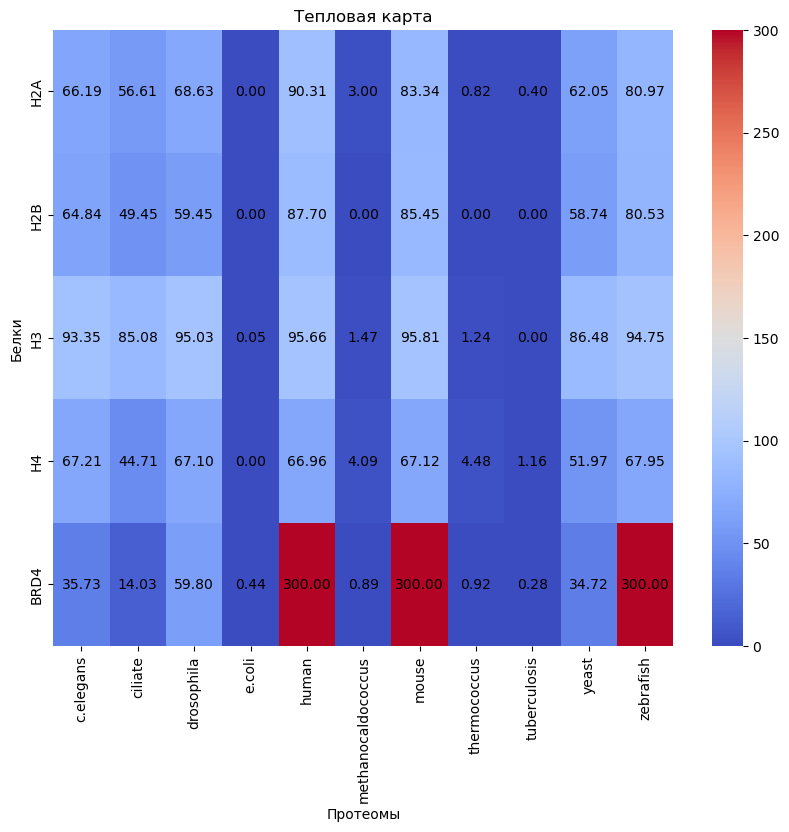

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='coolwarm')

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{df.iloc[i, j]:.2f}', ha='center', va='center')

plt.xlabel('Протеомы')
plt.ylabel('Белки')

plt.title('Тепловая карта')

plt.show()